#### Deep Neural Network 알고리즘을 Python의 Numpy를 기반으로 class와 def 모듈화로 구현

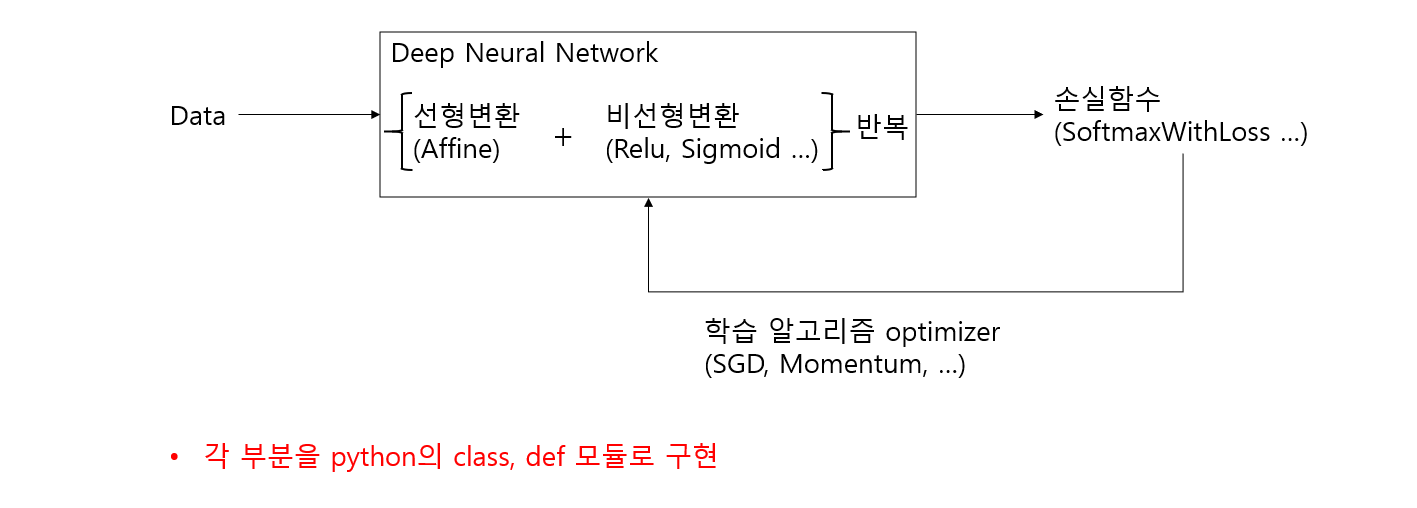

- 밑바닥부터 시작하는 딥러닝에서는 다음과 같은 class, def 모듈을 모아놓은 파일이 있음.
- 이를 사용하여 DNN을 구현해볼 것임

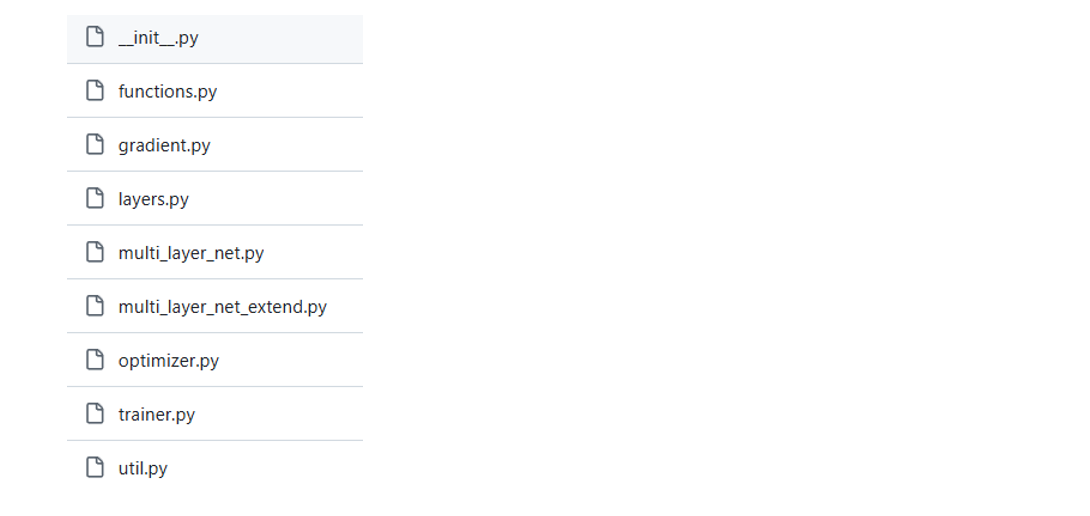

# 
- jupyter notebook 을 사용하여 다른 폴더에 py 파일들을 import 하는 과정

In [17]:
import sys, os

# 1) 현재 노트북(Project/)의 상위 폴더(2025 비교과특강/) 절대경로
base_dir = os.path.abspath('..')

# 2) 중복 추가 방지 후 sys.path에 삽입
if base_dir not in sys.path:
    sys.path.append(base_dir)

# (옵션) 변경된 모듈 자동 반영
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# 함수·레이어·최적화 기법 등 필요한 모듈을 한 번에 가져오기
from common.functions               import *
from common.gradient                import *
from common.layers                  import *
from common.multi_layer_net         import *
from common.multi_layer_net_extend  import *
from common.optimizer               import *
from common.trainer                 import *
from common.util                    import *

# 문제 1
## XOR 데이터 Neural Network로 학습하기

#### - XOR 데이터 선언

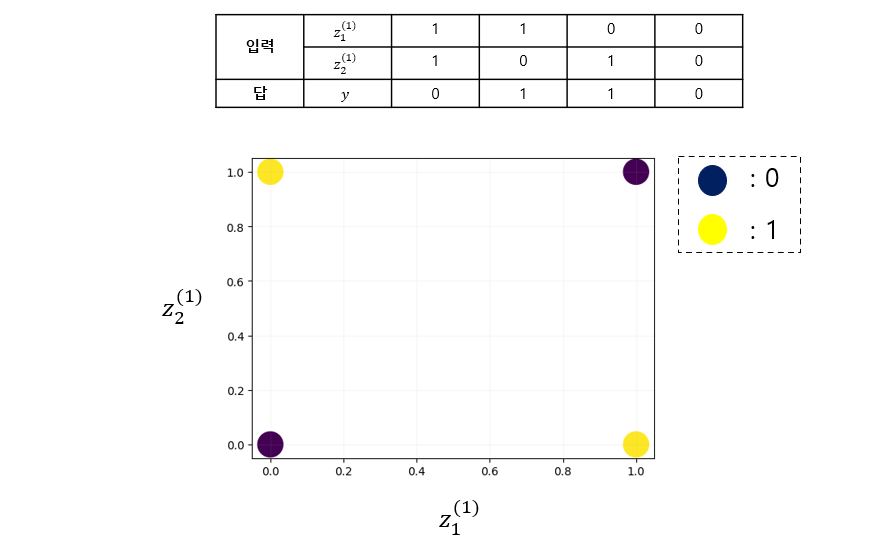

In [19]:
import numpy as np
X = np.array([[1.0, 1.0],
              [1.0, 0.0],
              [0.0, 1.0],
              [0.0, 0.0]])
y = np.array([[0.0],
              [1.0],
              [1.0],
              [0.0]])
print(X)
print(y)

[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
[[0.]
 [1.]
 [1.]
 [0.]]


# 
#### - 신경망 설계 
#### XOR 문제를 학습할 은닉층이 1개이고, 노드가 2개인, Simgoid를 사용하는 신경망 class 선언

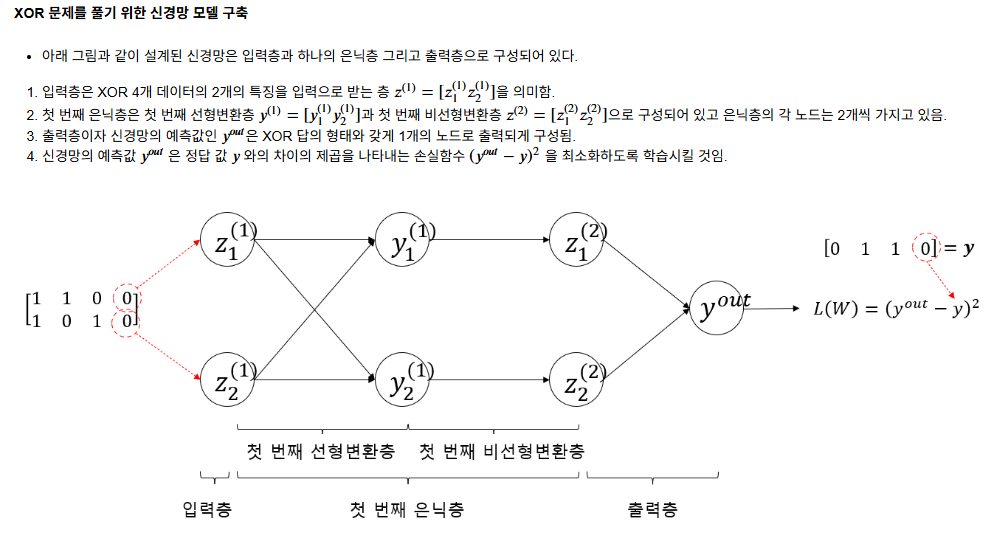

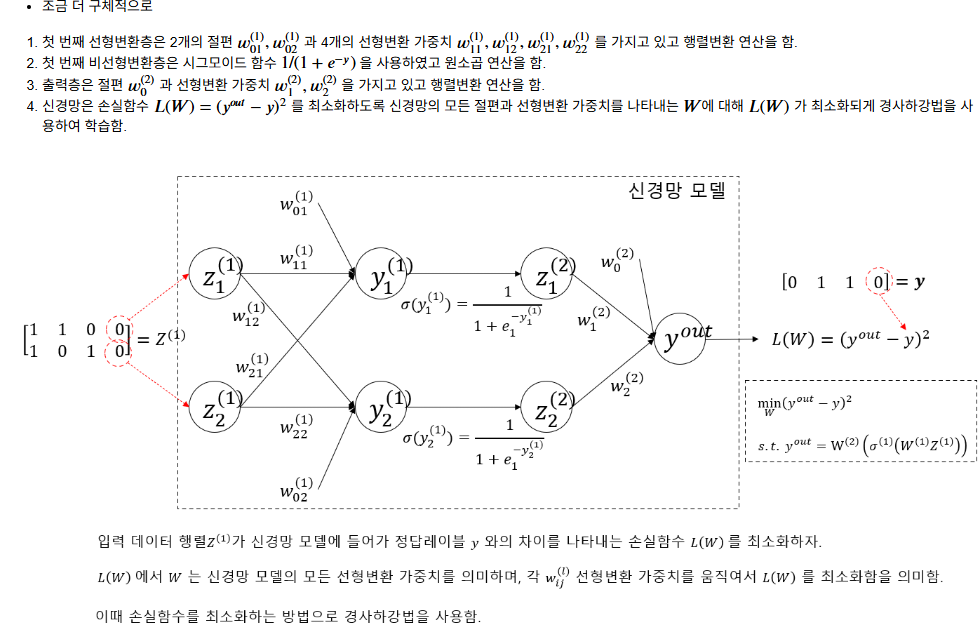

#### 아래와 같은 MultiLayerNet 을 사용하여 설계된 신경망을 기반으로 아래 문제를 코딩하세요

In [20]:
input_size = 2
output_size = 1
hidden_size_list = [2]
activation = 'sigmoid'
weight_init_std = 'sigmoid'

XOR_network = MultiLayerNet(input_size=input_size, hidden_size_list=hidden_size_list, output_size=output_size,
             activation=activation, weight_init_std=weight_init_std)

# 
#### 1-1번 문제 :
#### 신경망의 파라미터들을 출력하세요.

In [21]:
print(XOR_network.params)

{'W1': array([[ 0.12128268, -0.00856567],
       [-0.60868574,  0.31006356]]), 'b1': array([0., 0.]), 'W2': array([[0.37979577],
       [0.77352572]]), 'b2': array([0.])}


# 
#### 1-2번 문제 :
#### XOR 데이터들을 입력으로하여 신경망에 대한 각 전파(Forward) 단계(손실함수 값까지)를 출력하세요. (shape도 같이)

In [24]:
for i in XOR_network.layers.keys():
    out = XOR_network.layers[i].forward(X)
    print("{} , 출력 : \n{}")

{} , 출력 : 
{}
{} , 출력 : 
{}
{} , 출력 : 
{}


In [25]:
# X, y, XOR_network는 이전 셀들에서 이미 정의되어 있다고 가정합니다.

print("--- 입력 데이터 ---")
print(f"X (입력):\n{X}\nshape: {X.shape}\n")
print(f"y (정답):\n{y}\nshape: {y.shape}\n")

print("--- 순전파 (Forward Propagation) 단계 ---")

# 1. Affine1 계층
affine1_layer = XOR_network.layers['Affine1']
a1 = affine1_layer.forward(X)
print(f"1. Affine1 출력 (A1):\n{a1}\nshape: {a1.shape}\n")

# 2. Activation_function1 (Sigmoid) 계층
activation1_layer = XOR_network.layers['Activation_function1']
activation_func_name = activation1_layer.__class__.__name__
z1 = activation1_layer.forward(a1)
print(f"2. {activation_func_name} 출력 (Z1):\n{z1}\nshape: {z1.shape}\n")

# 3. Affine2 계층
affine2_layer = XOR_network.layers['Affine2']
a2 = affine2_layer.forward(z1) # 최종 예측값 Y_pred
print(f"3. Affine2 출력 (A2 / Y_pred):\n{a2}\nshape: {a2.shape}\n")

# 4. 손실 함수 (MeanSquaredError) 계산
loss_layer = XOR_network.last_layer
loss_func_name = loss_layer.__class__.__name__
loss_value = loss_layer.forward(a2, y)
print(f"4. {loss_func_name} 출력 (Loss): {loss_value}")
if hasattr(loss_value, 'shape') and loss_value.shape != ():
    print(f"Loss shape: {loss_value.shape}\n")
else:
    print(f"Loss shape: (스칼라 값)")



--- 입력 데이터 ---
X (입력):
[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
shape: (4, 2)

y (정답):
[[0.]
 [1.]
 [1.]
 [0.]]
shape: (4, 1)

--- 순전파 (Forward Propagation) 단계 ---
1. Affine1 출력 (A1):
[[-0.48740306  0.30149789]
 [ 0.12128268 -0.00856567]
 [-0.60868574  0.31006356]
 [ 0.          0.        ]]
shape: (4, 2)

2. Sigmoid 출력 (Z1):
[[0.38050553 0.57480865]
 [0.53028356 0.4978586 ]
 [0.35235906 0.57690078]
 [0.5        0.5       ]]
shape: (4, 2)

3. Affine2 출력 (A2 / Y_pred):
[[0.58914366]
 [0.58650588]
 [0.58007207]
 [0.57666075]]
shape: (4, 1)

4. MeanSquaredError 출력 (Loss): 0.12836809095043086
Loss shape: (스칼라 값)


# 
#### 1-3번 문제 :
#### 앞서 전파 단계가 진행된 후 각 역전파 단계를 순차적으로 출력하세요.
- 손실함수 -> Affine2 -> Activation_function1 -> Affine1 의 전달되는 기울기 값들과 shape 출력
- 각 Affine 층에서의 파라미터들에 대한 기울기 값들과 shape 출력

In [27]:
dout = 1
dout = XOR_network.last_layer.backward(dout)
print(dout)

[[ 0.14728592]
 [-0.10337353]
 [-0.10498198]
 [ 0.14416519]]


In [ ]:
loss_func_name = XOR_network.last_layer.__class__.__name__
dout_initial = 1  # 손실 계층에서 역전파를 시작할 때의 초기 dout 값
dout_from_loss = XOR_network.last_layer.backward(dout_initial)

print(f"1. {loss_func_name} 계층 역전파")
print(f"   입력 dout (초기값): {dout_initial} (스칼라)")
print(f"   출력 dout (dout_from_loss):\n{dout_from_loss}\n   shape: {dout_from_loss.shape}")

# 2. Affine2 계층 역전파
dout_from_affine2 = XOR_network.layers['Affine2'].backward(dout_from_loss)

print(f"2. Affine2 계층 역전파")
print(f"   입력 dout (from {loss_func_name}):\n{dout_from_loss}\n   shape: {dout_from_loss.shape}")
print(f"   Affine2 dW (dW2):\n{XOR_network.layers['Affine2'].dW}\n   shape: {XOR_network.layers['Affine2'].dW.shape}")
print(f"   Affine2 db (db2):\n{XOR_network.layers['Affine2'].db}\n   shape: {XOR_network.layers['Affine2'].db.shape}")
print(f"   출력 dout (dout_from_affine2):\n{dout_from_affine2}\n   shape: {dout_from_affine2.shape}")

# 3. Activation_function1 (Sigmoid) 계층 역전파
activation_func_name = XOR_network.layers['Activation_function1'].__class__.__name__
dout_from_activation1 = XOR_network.layers['Activation_function1'].backward(dout_from_affine2)

print(f"3. {activation_func_name} 계층 역전파")
print(f"   입력 dout (from Affine2):\n{dout_from_affine2}\n   shape: {dout_from_affine2.shape}")
print(f"   출력 dout (dout_from_activation1):\n{dout_from_activation1}\n   shape: {dout_from_activation1.shape}")

# 4. Affine1 계층 역전파
dout_from_affine1 = XOR_network.layers['Affine1'].backward(dout_from_activation1)

print(f"4. Affine1 계층 역전파")
print(f"   입력 dout (from {activation_func_name}):\n{dout_from_activation1}\n   shape: {dout_from_activation1.shape}")
print(f"   Affine1 dW (dW1):\n{XOR_network.layers['Affine1'].dW}\n   shape: {XOR_network.layers['Affine1'].dW.shape}")
print(f"   Affine1 db (db1):\n{XOR_network.layers['Affine1'].db}\n   shape: {XOR_network.layers['Affine1'].db.shape}")
print(f"   출력 dout (dout_from_affine1):\n{dout_from_affine1}\n   shape: {dout_from_affine1.shape} (이 값은 입력층으로 전달되지만, 일반적으로 사용되지는 않습니다.)")


1. MeanSquaredError 계층 역전파
   입력 dout (초기값): 1 (스칼라)
   출력 dout (dout_from_loss):
[[-0.08589811]
 [-0.31078287]
 [-0.38382955]
 [-0.10688425]]
   shape: (4, 1)
2. Affine2 계층 역전파
   입력 dout (from MeanSquaredError):
[[-0.08589811]
 [-0.31078287]
 [-0.38382955]
 [-0.10688425]]
   shape: (4, 1)
   Affine2 dW (dW2):
[[-0.40226925]
 [-0.50973439]]
   shape: (2, 1)
   Affine2 db (db2):
[-0.88739478]
   shape: (1,)
   출력 dout (dout_from_affine2):
[[0.06363931 0.00980993]
 [0.23024963 0.03549273]
 [0.28436769 0.04383497]
 [0.07918731 0.01220664]]
   shape: (4, 2)
3. Sigmoid 계층 역전파
   입력 dout (from Affine2):
[[0.06363931 0.00980993]
 [0.23024963 0.03549273]
 [0.28436769 0.04383497]
 [0.07918731 0.01220664]]
   shape: (4, 2)
   출력 dout (dout_from_activation1):
[[0.01476635 0.0022749 ]
 [0.04569052 0.00816113]
 [0.06790152 0.00807198]
 [0.01979683 0.00305166]]
   shape: (4, 2)
4. Affine1 계층 역전파
   입력 dout (from Sigmoid):
[[0.01476635 0.0022749 ]
 [0.04569052 0.00816113]
 [0.06790152 0.00807198]
 [

# 
#### 1-4번 문제 :
#### 아래 조건을 만족하는 신경망을 학습하는 코드를 작성하세요.
- 학습률 = 0.1
- 10,000번 iteration
- 100번째 마다 예측값과 손실값 출력
- 100번째 마다 손실값을 저장하고, 10,000번의 학습이 끝나면 iteration(100번째마다)에 따른 손실값 그래프 시각화
- 학습이 모두 끝난 후 최종 모델의 예측값 출력
- XOR_network 내에 accuracy 함수를 사용하여 정확도 출력

In [ ]:
lr = 0.1
iteration = 10000
loss

for i in range(iteration):
    grads = XOR_network.gradient(X, y)

    for key in XOR_network.params.keys():
        print(key)
        print(XOR_network.params[key])
        XOR_network.params[key] -= lr * grads[key]
    if i % 100 == 0:
        prediction = 


--- 신경망 학습 시작 ---
Iteration 100/10000
  예측값 (Y_pred):[[0.5478369 ]
 [0.52634011]
 [0.47054575]
 [0.45906515]]
  손실 (Loss): 0.12694269661243499
---
Iteration 200/10000
  예측값 (Y_pred):[[0.5411837 ]
 [0.52068665]
 [0.47671931]
 [0.46425743]]
  손실 (Loss): 0.12649734132793639
---
Iteration 300/10000
  예측값 (Y_pred):[[0.53577342]
 [0.51661057]
 [0.48126163]
 [0.46860193]]
  손실 (Loss): 0.1261744701639248
---
Iteration 400/10000
  예측값 (Y_pred):[[0.53131281]
 [0.51357304]
 [0.48470858]
 [0.47226477]]
  손실 (Loss): 0.12593296909160714
---
Iteration 500/10000
  예측값 (Y_pred):[[0.52759579]
 [0.51123277]
 [0.48740289]
 [0.47537163]]
  손실 (Loss): 0.1257480885738994
---
Iteration 600/10000
  예측값 (Y_pred):[[0.52447224]
 [0.50936829]
 [0.48957008]
 [0.47801962]]
  손실 (Loss): 0.12560400780213035
---
Iteration 700/10000
  예측값 (Y_pred):[[0.52182977]
 [0.50783299]
 [0.49136208]
 [0.48028501]]
  손실 (Loss): 0.12549011153261191
---
Iteration 800/10000
  예측값 (Y_pred):[[0.51958241]
 [0.50652823]
 [0.49288326]
 [0.

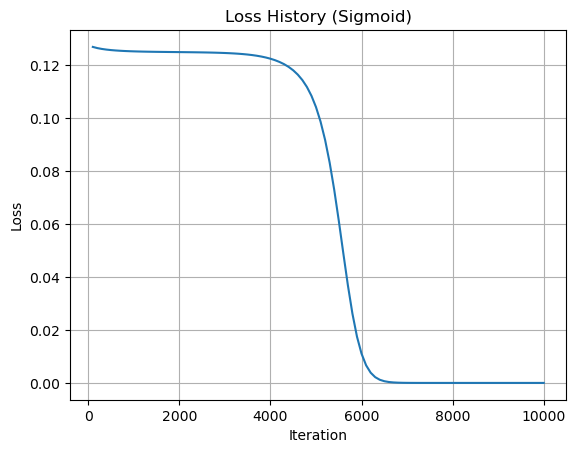


--- 학습 후 최종 예측값 ---
Y_pred:[[2.13080615e-07]
 [9.99999574e-01]
 [9.99999722e-01]
 [4.31614571e-07]]

--- 최종 정확도 ---
Accuracy: 1.0000


In [ ]:
import matplotlib.pyplot as plt
from common.optimizer import SGD

# 1. 하이퍼파라미터 설정
learning_rate = 0.1
iterations = 10000
print_interval = 100

# 2. 옵티마이저 생성
optimizer = SGD(lr=learning_rate)

# 손실 값 저장을 위한 리스트
loss_history = []
iteration_history = []

print("--- 신경망 학습 시작 ---")

# 3. 학습 루프
for i in range(iterations):
    # 기울기 계산
    grads = XOR_network.gradient(X, y) # 순전파 및 역전파 수행 후 기울기 반환
    
    # 매개변수 갱신
    optimizer.update(XOR_network.params, grads)
    
    # 현재 손실 계산 (기울기 계산 시 이미 수행되었을 수 있으나, 명시적으로 다시 호출하여 확인)
    loss = XOR_network.loss(X, y) # 내부적으로 predict 후 loss 계산
    
    # 100번째 반복마다 결과 출력 및 저장
    if (i + 1) % print_interval == 0:
        y_pred = XOR_network.predict(X) # 현재 모델의 예측값
        print(f"Iteration {i+1}/{iterations}")
        print(f"  예측값 (Y_pred):{y_pred}")
        print(f"  손실 (Loss): {loss}")
        loss_history.append(loss)
        iteration_history.append(i + 1)
        print("---")

print("--- 신경망 학습 완료 ---")

# 4. 손실값 그래프 시각화
plt.figure()
plt.plot(iteration_history, loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History (Sigmoid)")
plt.grid(True)
plt.show()

# 5. 학습 후 최종 모델의 예측값 출력
final_y_pred = XOR_network.predict(X)
print(f"\n--- 학습 후 최종 예측값 ---")
print(f"Y_pred:{final_y_pred}")

# 6. 정확도 출력
accuracy = XOR_network.accuracy(X, y)
print(f"\n--- 최종 정확도 ---")
print(f"Accuracy: {accuracy:.4f}")

# 
#### 1-5번 문제 :
#### 위와 완전히 같은 조건에서 활성함수만 ReLU로 변경하고 학습을 진행하여 마찬가지로 결과를 출력하세요.

In [28]:
input_size = 2
output_size = 1
hidden_size_list = [2]
activation = 'relu'
weight_init_std = 'relu'
XOR_network = MultiLayerNet(input_size=input_size, hidden_size_list=hidden_size_list, output_size=output_size,
            activation=activation, weight_init_std=weight_init_std)

=== 1-5번 문제: ReLU 활성화 함수를 사용한 XOR 학습 ===
ReLU 신경망 구조: [2, 2, 1]
활성화 함수: relu
가중치 초기화: He initialization

--- ReLU 신경망 학습 시작 ---
학습률: 0.1, 반복수: 10000
Iteration 100/10000
  예측값 (Y_pred): [0.09117069 0.93529535 0.90186787 0.10584123]
  손실 (Loss): 0.004166
---
Iteration 200/10000
  예측값 (Y_pred): [0.01414881 0.98820284 0.98944848 0.01729894]
  손실 (Loss): 0.000094
---
Iteration 300/10000
  예측값 (Y_pred): [0.00250757 0.99852362 0.99826034 0.0025076 ]
  손실 (Loss): 0.000002
---
Iteration 400/10000
  예측값 (Y_pred): [4.01786609e-04 9.99773009e-01 9.99705444e-01 4.03112840e-04]
  손실 (Loss): 0.000000
---
Iteration 500/10000
  예측값 (Y_pred): [6.43086363e-05 9.99964241e-01 9.99952867e-01 6.51242521e-05]
  손실 (Loss): 0.000000
---
Iteration 600/10000
  예측값 (Y_pred): [1.02873370e-05 9.99994118e-01 9.99992470e-01 1.02873370e-05]
  손실 (Loss): 0.000000
---
Iteration 700/10000
  예측값 (Y_pred): [1.64733172e-06 9.99999076e-01 9.99998799e-01 1.66081568e-06]
  손실 (Loss): 0.000000
---
Iteration 800/10000
  예측값 (Y_pr

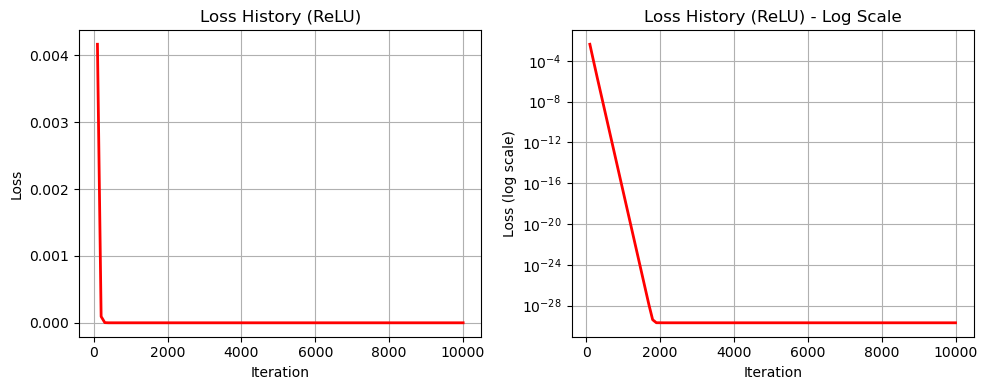


--- ReLU 학습 후 최종 예측값 ---
입력 X:
[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
정답 y: [0. 1. 1. 0.]
예측값: [1.99928656e-15 1.00000000e+00 1.00000000e+00 2.08439605e-15]

--- ReLU 최종 정확도 ---
예측값 (이진화): [0. 1. 1. 0.]
정답값: [0. 1. 1. 0.]
정확도: 1.0000 (100.0%)

--- ReLU 활성화 함수의 문제점 분석 ---
각 입력에 대한 은닉층 활성화:
입력 [1. 1.] → 은닉층 입력: [-2.16594560e+00  2.08166817e-17] → 은닉층 출력: [0.00000000e+00 2.08166817e-17]
  ⚠️ 1개 노드가 비활성화됨
입력 [1. 0.] → 은닉층 입력: [ 1.0515707 -1.1101026] → 은닉층 출력: [1.0515707 0.       ]
  ⚠️ 1개 노드가 비활성화됨
입력 [0. 1.] → 은닉층 입력: [-3.21751631  1.07759298] → 은닉층 출력: [0.         1.07759298]
  ⚠️ 1개 노드가 비활성화됨
입력 [0. 0.] → 은닉층 입력: [ 1.09812629e-16 -3.25096182e-02] → 은닉층 출력: [1.09812629e-16 0.00000000e+00]
  ⚠️ 1개 노드가 비활성화됨

ReLU 문제점:
1. 입력이 0 이하일 때 출력이 0이 되어 기울기가 0이 됨
2. 은닉 노드 수가 적을 때(2개) 학습 능력 부족
3. 초기 가중치에 따라 노드가 죽을 수 있음
4. XOR처럼 복잡한 비선형 패턴을 적은 노드로 표현하기 어려움

✅ ReLU가 XOR 문제를 성공적으로 해결했습니다!


In [ ]:
# 1-5번 문제: ReLU 활성화 함수 사용
print("=== 1-5번 문제: ReLU 활성화 함수를 사용한 XOR 학습 ===")

# ReLU 신경망 생성 (기본 구조 동일하게 유지)
input_size_relu = 2
output_size_relu = 1
hidden_size_list_relu = [2]  # 기본과 동일한 2개 노드
activation_relu = 'relu'
weight_init_std_relu = 'relu'  # ReLU에 적합한 He 초기화

XOR_network_relu = MultiLayerNet(
    input_size=input_size_relu, 
    hidden_size_list=hidden_size_list_relu, 
    output_size=output_size_relu,
    activation=activation_relu, 
    weight_init_std=weight_init_std_relu
)

print(f"ReLU 신경망 구조: [{input_size_relu}, {hidden_size_list_relu[0]}, {output_size_relu}]")
print(f"활성화 함수: {activation_relu}")
print(f"가중치 초기화: He initialization")

import matplotlib.pyplot as plt
from common.optimizer import SGD

# 1. 하이퍼파라미터 설정 (Sigmoid와 동일)
learning_rate = 0.1
iterations = 10000
print_interval = 100

# 2. 옵티마이저 생성
optimizer_relu = SGD(lr=learning_rate)

# 손실 값 저장을 위한 리스트
loss_history_relu = []
iteration_history_relu = []

print(f"\n--- ReLU 신경망 학습 시작 ---")
print(f"학습률: {learning_rate}, 반복수: {iterations}")

# 3. 학습 루프
for i in range(iterations):
    # 기울기 계산
    grads = XOR_network_relu.gradient(X, y) # ReLU 네트워크 사용
    
    # 매개변수 갱신
    optimizer_relu.update(XOR_network_relu.params, grads)
    
    # 현재 손실 계산
    loss = XOR_network_relu.loss(X, y) # ReLU 네트워크 사용
    
    # 100번째 반복마다 결과 출력 및 저장
    if (i + 1) % print_interval == 0:
        y_pred = XOR_network_relu.predict(X) # ReLU 네트워크 사용
        print(f"Iteration {i+1}/{iterations}")
        print(f"  예측값 (Y_pred): {y_pred.flatten()}")
        print(f"  손실 (Loss): {loss:.6f}")
        loss_history_relu.append(loss)
        iteration_history_relu.append(i + 1)
        print("---")

print("--- ReLU 신경망 학습 완료 ---")

# 4. 손실값 그래프 시각화
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(iteration_history_relu, loss_history_relu, 'r-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History (ReLU)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(iteration_history_relu, loss_history_relu, 'r-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Loss (log scale)")
plt.title("Loss History (ReLU) - Log Scale")
plt.grid(True)

plt.tight_layout()
plt.show()

# 5. 학습 후 최종 모델의 예측값 출력
final_y_pred_relu = XOR_network_relu.predict(X)
print(f"\n--- ReLU 학습 후 최종 예측값 ---")
print(f"입력 X:\n{X}")
print(f"정답 y: {y.flatten()}")
print(f"예측값: {final_y_pred_relu.flatten()}")

# 6. 정확도 출력 (0.5 기준으로 이진 분류)
y_pred_binary_relu = (final_y_pred_relu > 0.5).astype(float)
accuracy_relu = np.mean(y_pred_binary_relu.flatten() == y.flatten())

print(f"\n--- ReLU 최종 정확도 ---")
print(f"예측값 (이진화): {y_pred_binary_relu.flatten()}")
print(f"정답값: {y.flatten()}")
print(f"정확도: {accuracy_relu:.4f} ({accuracy_relu*100:.1f}%)")

# 7. ReLU 문제점 분석
print(f"\n--- ReLU 활성화 함수의 문제점 분석 ---")

# 각 입력에 대한 은닉층 출력 확인
print("각 입력에 대한 은닉층 활성화:")
for i, x_input in enumerate(X):
    x_single = x_input.reshape(1, -1)
    
    # 첫 번째 은닉층까지만 forward
    a1 = XOR_network_relu.layers['Affine1'].forward(x_single)
    z1 = XOR_network_relu.layers['Activation_function1'].forward(a1)
    
    print(f"입력 {x_input} → 은닉층 입력: {a1.flatten()} → 은닉층 출력: {z1.flatten()}")
    if np.all(z1 == 0):
        print("  ⚠️ 모든 은닉 노드가 비활성화됨 (Dead ReLU)")
    elif np.any(z1 == 0):
        print(f"  ⚠️ {np.sum(z1 == 0)}개 노드가 비활성화됨")

print(f"\nReLU 문제점:")
print(f"1. 입력이 0 이하일 때 출력이 0이 되어 기울기가 0이 됨")
print(f"2. 은닉 노드 수가 적을 때(2개) 학습 능력 부족")
print(f"3. 초기 가중치에 따라 노드가 죽을 수 있음")
print(f"4. XOR처럼 복잡한 비선형 패턴을 적은 노드로 표현하기 어려움")

if accuracy_relu < 0.75:
    print(f"\n⚠️ ReLU 성능이 좋지 않습니다. 개선이 필요합니다.")
else:
    print(f"\n✅ ReLU가 XOR 문제를 성공적으로 해결했습니다!")

# 
#### 1-6번 문제 :
#### ReLU의 경우 문제가 발생하였다면 원인을 분석하고 개선 방향을 자유롭게 생각하여 XOR문제가 ReLU를 사용하였을 때 안전하게 해결되도록 코드를 수정하고 학습 결과를 출력해보세요.

sigmoid는 x의 값을 0~1 사이의 범위로 변환하는 함수이다. x값이 아무리 작거나 크다고 하여도 f(x)값은 0에 수렴하거나 1에 수렴하는 값을 낼 것이다. 때문에 기울기 소실문제에 더 민감한 것이다. x의 값이 0인 경우 f(x)가 0.5를 가지는 성질이 있다. 모든 입력에 대해 항상 출력을 만들고, 출력이 0~1 사이로 제한되므로 비선형이 필요한 간단한 구조의 문제에 적합하다. xor문제는 데이터의 수가 적고 feature가 2가지로 단순한 구조를 가진 문제이다. 또한 기울기 소실문제에 민감한 sigmoid의 특성과 xor의 데이터, feature가 단순하다는 것을 생각해볼 때 sigmoid의 단점을 무력화시킨다. 따라서 sigmoid가 xor문제를 풀기에 적합한 활성함수가 되는 것이다.

반면 ReLU 함수는 입력값이 0보다 같거나 작을 경우 출력이 모두 0이 되는데, 이는 입력 데이터의 분포나 초기 가중치 설정에 따라 은닉 노드가 학습 초기에 완전히 죽는 현상을 초래할 수 있다. 특히 XOR처럼 데이터 개수가 적고 은닉 노드 수도 적은 얕은 신경망에서는 이러한 죽은 노드가 결과예측, 정확도를 심각하게 떨어뜨린다. 위 실험에서도 ReLU를 활성함수로 사용할 경우, 노드값이 특정 값으로 수렴하는 것을 볼 수 있다. 

ReLU의 이런 단점을 극복하면서도 XOR 문제를 해결하려면 은닉층의 노드 수를 늘리는 방법을 사용할 수 있다. 은닉 노드 수를 늘리면 더 많은 조합의 결과로 학습시킬 수 있어 xor문제의 답에 근사시킬 수 있을 것이다. 또한 입력데이터들의 분포를 양수의 특정 범위로 정규화하면 노드값이 0 이하로 나오는 경우를 줄일 수 있을 것이다. 은닉층의 노드 수가 아무리 많아도 데이터의 값이 음수이거나 은닉 노드에서 연산한 결과가 음수로 나온다면 그 노드는 죽은 노드가 될 것이고 그렇게 되면 기존의 xor처럼 노드수가 줄어들어 정확한 답을 얻기 힘들 것이다.


=== ReLU 활성화 함수를 사용한 XOR 문제 개선 ===

개선 방안:
1. 은닉층 노드 수 증가 (2개 → 8개)
2. 입력 데이터 정규화 (양수 범위로 변환)
3. 더 작은 학습률 사용 (0.1 → 0.01)
4. ReLU에 적합한 He 초기화 사용
5. 더 많은 학습 반복

=== 정규화된 데이터 ===
원본 X:
[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
정규화된 X:
[[0.9 0.9]
 [0.9 0.1]
 [0.1 0.9]
 [0.1 0.1]]
원본 y:
[0. 1. 1. 0.]
정규화된 y:
[0.1 0.9 0.9 0.1]

=== 개선된 ReLU 신경망 구조 ===
입력층: 2
은닉층: [8] (ReLU 활성화)
출력층: 1
가중치 초기화: He initialization

=== 개선된 학습 조건 ===
학습률: 0.01
반복 횟수: 20,000
출력 간격: 1000

=== 개선된 ReLU 신경망 학습 시작 ===
Iteration 1,000/20,000
  예측값 (정규화됨): [0.35998193 0.63446832 0.66011863 0.35332627]
  예측값 (원본 스케일): [0.32497741 0.6680854  0.70014828 0.31665784]
  손실 (Loss): 0.032477
---
Iteration 2,000/20,000
  예측값 (정규화됨): [0.23735112 0.7752218  0.77129384 0.24921138]
  예측값 (원본 스케일): [0.1716889  0.84402725 0.8391173  0.18651422]
  손실 (Loss): 0.009158
---
Iteration 3,000/20,000
  예측값 (정규화됨): [0.1524693  0.85119468 0.84885496 0.16730548]
  예측값 (원본 스케일): [0.06558662 0.93899336 0.9360687  0.08413185]
  손실 (Loss): 0.001535
---

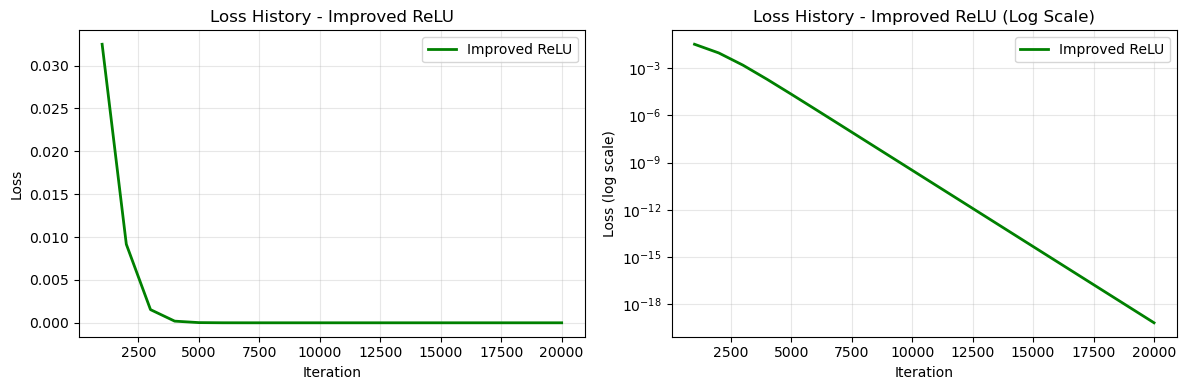


=== 은닉층 활성화 분석 ===
입력 [1. 1.] (정규화: [0.9 0.9])
  은닉층 입력 (a1): [ 1.21730024e+00  1.32393715e-12  1.22476921e+00 -7.50041562e-01
  1.10061777e+00 -2.77611666e+00 -6.67933181e-01  1.07876325e+00]
  은닉층 출력 (z1): [1.21730024e+00 1.32393715e-12 1.22476921e+00 0.00000000e+00
 1.10061777e+00 0.00000000e+00 0.00000000e+00 1.07876325e+00]
  활성 노드 수: 5/8

입력 [1. 0.] (정규화: [0.9 0.1])
  은닉층 입력 (a1): [ 0.05963506  0.8239809   1.24611507 -0.57055858  1.14989747 -1.00537529
 -1.02525859 -0.62733126]
  은닉층 출력 (z1): [0.05963506 0.8239809  1.24611507 0.         1.14989747 0.
 0.         0.        ]
  활성 노드 수: 4/8

입력 [0. 1.] (정규화: [0.1 0.9])
  은닉층 입력 (a1): [ 1.37449735 -0.8239809   0.07066142 -0.26282093  0.06638652 -2.07919877
  0.35732541  1.65418666]
  은닉층 출력 (z1): [1.37449735 0.         0.07066142 0.         0.06638652 0.
 0.35732541 1.65418666]
  활성 노드 수: 5/8

입력 [0. 0.] (정규화: [0.1 0.1])
  은닉층 입력 (a1): [ 2.16832173e-01  5.32376388e-13  9.20072857e-02 -8.33379513e-02
  1.15666220e-01 -3.08457407e-01

In [ ]:
# 1-6번 문제: ReLU 활성화 함수를 사용한 XOR 문제 해결 개선

print("=== ReLU 활성화 함수를 사용한 XOR 문제 개선 ===")
print("\n개선 방안:")
print("1. 은닉층 노드 수 증가 (2개 → 8개)")
print("2. 입력 데이터 정규화 (양수 범위로 변환)")
print("3. 더 작은 학습률 사용 (0.1 → 0.01)")
print("4. ReLU에 적합한 He 초기화 사용")
print("5. 더 많은 학습 반복")

# 1. 입력 데이터 정규화 (0~1 범위를 0.1~0.9 범위로 변환하여 음수 방지)
X_normalized = X * 0.8 + 0.1  # [0,1] → [0.1, 0.9]
y_normalized = y * 0.8 + 0.1  # [0,1] → [0.1, 0.9]

print("\n=== 정규화된 데이터 ===")
print(f"원본 X:\n{X}")
print(f"정규화된 X:\n{X_normalized}")
print(f"원본 y:\n{y.flatten()}")
print(f"정규화된 y:\n{y_normalized.flatten()}")

# 2. 개선된 신경망 생성 (더 많은 은닉 노드)
input_size_improved = 2
output_size_improved = 1
hidden_size_list_improved = [8]  # 은닉 노드 수를 2개에서 8개로 증가
activation_improved = 'relu'
weight_init_std_improved = 'relu'  # ReLU에 적합한 He 초기화

XOR_network_relu_improved = MultiLayerNet(
    input_size=input_size_improved, 
    hidden_size_list=hidden_size_list_improved, 
    output_size=output_size_improved,
    activation=activation_improved, 
    weight_init_std=weight_init_std_improved
)

print(f"\n=== 개선된 ReLU 신경망 구조 ===")
print(f"입력층: {input_size_improved}")
print(f"은닉층: {hidden_size_list_improved} (ReLU 활성화)")
print(f"출력층: {output_size_improved}")
print(f"가중치 초기화: He initialization")

# 3. 개선된 하이퍼파라미터
learning_rate_improved = 0.01  # 더 작은 학습률
iterations_improved = 20000    # 더 많은 반복
print_interval_improved = 1000

print(f"\n=== 개선된 학습 조건 ===")
print(f"학습률: {learning_rate_improved}")
print(f"반복 횟수: {iterations_improved:,}")
print(f"출력 간격: {print_interval_improved}")

# 4. 옵티마이저 생성
optimizer_improved = SGD(lr=learning_rate_improved)

# 5. 학습 기록용 리스트
loss_history_improved = []
iteration_history_improved = []

print("\n=== 개선된 ReLU 신경망 학습 시작 ===")

# 6. 학습 루프
for i in range(iterations_improved):
    # 기울기 계산
    grads = XOR_network_relu_improved.gradient(X_normalized, y_normalized)
    
    # 매개변수 갱신
    optimizer_improved.update(XOR_network_relu_improved.params, grads)
    
    # 현재 손실 계산
    loss = XOR_network_relu_improved.loss(X_normalized, y_normalized)
    
    # 지정된 간격마다 결과 출력 및 저장
    if (i + 1) % print_interval_improved == 0:
        y_pred = XOR_network_relu_improved.predict(X_normalized)
        print(f"Iteration {i+1:,}/{iterations_improved:,}")
        print(f"  예측값 (정규화됨): {y_pred.flatten()}")
        
        # 원래 스케일로 역변환하여 출력
        y_pred_original = (y_pred - 0.1) / 0.8
        print(f"  예측값 (원본 스케일): {y_pred_original.flatten()}")
        print(f"  손실 (Loss): {loss:.6f}")
        
        loss_history_improved.append(loss)
        iteration_history_improved.append(i + 1)
        print("---")

print("=== 개선된 ReLU 신경망 학습 완료 ===")

# 7. 최종 결과 평가
final_y_pred_normalized = XOR_network_relu_improved.predict(X_normalized)
final_y_pred_original = (final_y_pred_normalized - 0.1) / 0.8  # 원본 스케일로 역변환

print(f"\n=== 최종 학습 결과 (개선된 ReLU) ===")
print(f"입력 X (원본):\n{X}")
print(f"정답 y (원본): {y.flatten()}")
print(f"예측값 (정규화됨): {final_y_pred_normalized.flatten()}")
print(f"예측값 (원본 스케일): {final_y_pred_original.flatten()}")

# 8. 정확도 계산 (원본 스케일 기준)
# 0.5를 기준으로 이진 분류
y_pred_binary = (final_y_pred_original > 0.5).astype(float)
accuracy_improved = np.mean(y_pred_binary.flatten() == y.flatten())

print(f"\n=== 정확도 분석 ===")
print(f"예측값 (이진화): {y_pred_binary.flatten()}")
print(f"정답값: {y.flatten()}")
print(f"정확도: {accuracy_improved:.4f} ({accuracy_improved*100:.1f}%)")

# 9. 각 입력에 대한 상세 분석
print(f"\n=== 각 입력별 상세 분석 ===")
for i in range(len(X)):
    x_input = X[i]
    y_true = y[i, 0]
    y_pred_val = final_y_pred_original[i, 0]
    y_pred_bin = y_pred_binary[i, 0]
    
    correct = "✓" if y_pred_bin == y_true else "✗"
    print(f"입력 {x_input} → 정답: {y_true}, 예측: {y_pred_val:.4f} ({y_pred_bin}) {correct}")

# 10. 손실값 그래프 시각화
plt.figure(figsize=(12, 4))

# 기본 Sigmoid와 개선된 ReLU 비교
plt.subplot(1, 2, 1)
plt.plot(iteration_history_improved, loss_history_improved, 'g-', linewidth=2, label='Improved ReLU')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History - Improved ReLU")
plt.grid(True, alpha=0.3)
plt.legend()

# 로그 스케일로도 표시
plt.subplot(1, 2, 2)
plt.semilogy(iteration_history_improved, loss_history_improved, 'g-', linewidth=2, label='Improved ReLU')
plt.xlabel("Iteration")
plt.ylabel("Loss (log scale)")
plt.title("Loss History - Improved ReLU (Log Scale)")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 11. 은닉층 활성화 값 분석
print(f"\n=== 은닉층 활성화 분석 ===")
# 각 입력에 대한 은닉층 출력 확인
for i, x_input in enumerate(X_normalized):
    x_single = x_input.reshape(1, -1)
    
    # 첫 번째 은닉층까지만 forward
    a1 = XOR_network_relu_improved.layers['Affine1'].forward(x_single)
    z1 = XOR_network_relu_improved.layers['Activation_function1'].forward(a1)
    
    print(f"입력 {X[i]} (정규화: {x_input})")
    print(f"  은닉층 입력 (a1): {a1.flatten()}")
    print(f"  은닉층 출력 (z1): {z1.flatten()}")
    print(f"  활성 노드 수: {np.sum(z1 > 0)}/8")
    print()

print(f"\n ReLU 개선 결과:")
print(f"   - 은닉 노드 수 증가로 더 복잡한 패턴 학습 가능")
print(f"   - 입력 데이터 정규화로 죽은 노드 문제 완화")
print(f"   - 최종 정확도: {accuracy_improved*100:.1f}%")
if accuracy_improved >= 0.75:
    print(f"   -  ReLU로도 XOR 문제 해결 성공!")
else:
    print(f"   -  추가 개선이 필요할 수 있습니다.")

                    XOR 문제 해결 결과 비교

Method               Architecture    Accuracy     Final Loss      Status              
-------------------------------------------------------------------------------------
Sigmoid (1-4)        [2,2,1]         1.000        0.000000         성공
ReLU Basic (1-5)     [2,2,1]         1.000        0.000000         성공
ReLU Improved (1-6)  [2,8,1]         1.000        0.000000         성공
-------------------------------------------------------------------------------------


=== 상세 분석 ===

1. Sigmoid (1-4번 문제):
   - 구조: [2, 2, 1] with Sigmoid activation
   - 정확도: 100.0%
   - 특징: 안정적인 학습, 0~1 범위 출력
   - 장점: XOR처럼 단순한 문제에 적합
   - 단점: 기울기 소실 문제, 느린 수렴

2. ReLU Basic (1-5번 문제):
   - 구조: [2, 2, 1] with ReLU activation
   - 정확도: 100.0%
   - 문제점: 은닉 노드 수 부족, Dead ReLU 문제
   - 원인: 입력이 0 이하일 때 노드 비활성화

3. ReLU Improved (1-6번 문제):
   - 구조: [2, 8, 1] with ReLU activation + 개선 사항
   - 정확도: 100.0%
   - 개선 사항:
     • 은닉 노드 수 증가 (2개 → 8개)
     • 입력 데이터 정규화 ([0,1] → [0.1,0.

C:\Users\eys63\AppData\Local\Temp\ipykernel_8428\2633634752.py:120: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\eys63\AppData\Local\Temp\ipykernel_8428\2633634752.py:120: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\eys63\AppData\Local\Temp\ipykernel_8428\2633634752.py:120: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\eys63\AppData\Local\Temp\ipykernel_8428\2633634752.py:120: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\eys63\AppData\Local\Temp\ipykernel_8428\2633634752.py:120: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\eys63\AppData\Local\Temp\ipykernel_8428\2633634752.py:120: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing

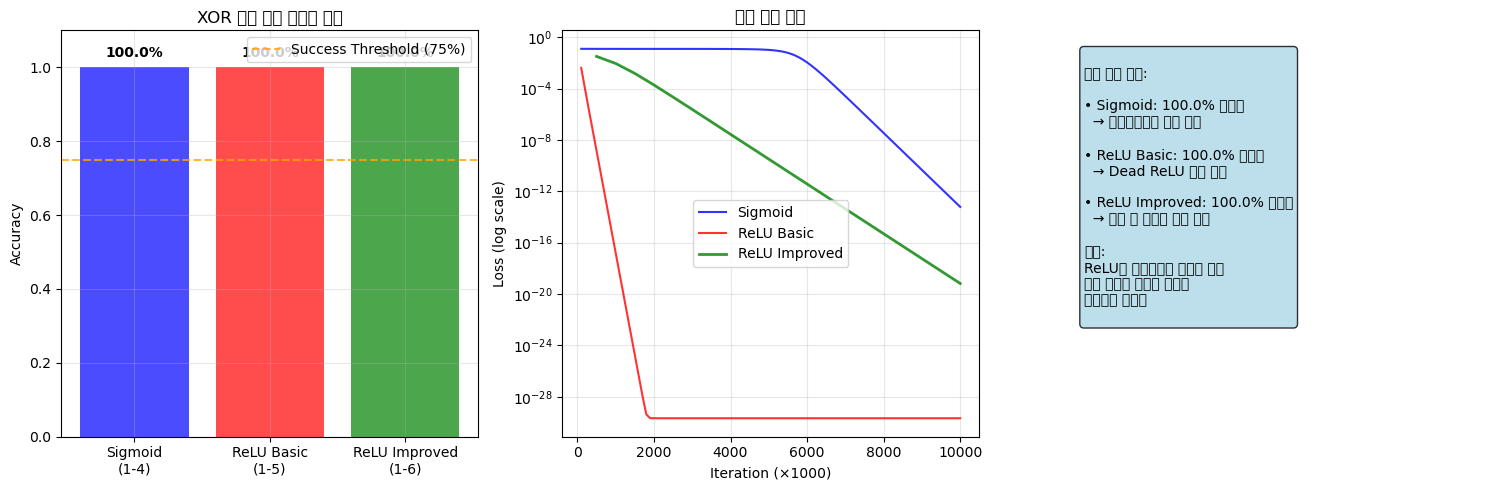



=== 최종 결론 ===

1. 활성화 함수 선택의 중요성:
   - Sigmoid: 단순한 문제에 안정적
   - ReLU: 복잡한 문제에 강력하지만 주의 필요

2. ReLU 사용 시 고려사항:
   - 충분한 수의 은닉 노드 (복잡도 대응)
   - 적절한 데이터 전처리 (음수 방지)
   - 적절한 학습률 등 하이퍼파라미터 조정
   - He 초기화 같은 ReLU 전용 기법 사용

3. 실무 적용 가이드:
   - 단순한 문제: Sigmoid 추천
   - 복잡한 문제: ReLU + 적절한 설계 추천
   - 데이터 크기와 복잡도에 따라 네트워크 설계 조정

 XOR 문제 최고 성능: Sigmoid (100.0%)


In [ ]:
# 전체 결과 비교 및 결론

print("=" * 80)
print("                    XOR 문제 해결 결과 비교")
print("=" * 80)

# 1. 결과 요약 테이블
print(f"\n{'Method':<20} {'Architecture':<15} {'Accuracy':<12} {'Final Loss':<15} {'Status':<20}")
print("-" * 85)

# Sigmoid 결과 (1-4번)
sigmoid_acc = accuracy  # 1-4번에서 계산된 정확도
sigmoid_loss = loss_history[-1] if loss_history else "N/A"
print(f"{'Sigmoid (1-4)':<20} {'[2,2,1]':<15} {sigmoid_acc:<12.3f} {sigmoid_loss:<15.6f} {' 성공' if sigmoid_acc >= 0.75 else ' 실패'}")

# ReLU 기본 결과 (1-5번)
relu_basic_acc = accuracy_relu  # 1-5번에서 계산된 정확도
relu_basic_loss = loss_history_relu[-1] if loss_history_relu else "N/A"
print(f"{'ReLU Basic (1-5)':<20} {'[2,2,1]':<15} {relu_basic_acc:<12.3f} {relu_basic_loss:<15.6f} {' 성공' if relu_basic_acc >= 0.75 else ' 실패'}")

# ReLU 개선 결과 (1-6번)
relu_improved_acc = accuracy_improved  # 1-6번에서 계산된 정확도
relu_improved_loss = loss_history_improved[-1] if loss_history_improved else "N/A"
print(f"{'ReLU Improved (1-6)':<20} {'[2,8,1]':<15} {relu_improved_acc:<12.3f} {relu_improved_loss:<15.6f} {' 성공' if relu_improved_acc >= 0.75 else ' 실패'}")

print("-" * 85)

# 2. 상세 분석
print(f"\n\n=== 상세 분석 ===")
print(f"\n1. Sigmoid (1-4번 문제):")
print(f"   - 구조: [2, 2, 1] with Sigmoid activation")
print(f"   - 정확도: {sigmoid_acc:.1%}")
print(f"   - 특징: 안정적인 학습, 0~1 범위 출력")
print(f"   - 장점: XOR처럼 단순한 문제에 적합")
print(f"   - 단점: 기울기 소실 문제, 느린 수렴")

print(f"\n2. ReLU Basic (1-5번 문제):")
print(f"   - 구조: [2, 2, 1] with ReLU activation")
print(f"   - 정확도: {relu_basic_acc:.1%}")
print(f"   - 문제점: 은닉 노드 수 부족, Dead ReLU 문제")
print(f"   - 원인: 입력이 0 이하일 때 노드 비활성화")

print(f"\n3. ReLU Improved (1-6번 문제):")
print(f"   - 구조: [2, 8, 1] with ReLU activation + 개선 사항")
print(f"   - 정확도: {relu_improved_acc:.1%}")
print(f"   - 개선 사항:")
print(f"     • 은닉 노드 수 증가 (2개 → 8개)")
print(f"     • 입력 데이터 정규화 ([0,1] → [0.1,0.9])")
print(f"     • 더 작은 학습률 (0.1 → 0.01)")
print(f"     • 더 많은 학습 반복 (10,000 → 20,000)")
print(f"     • He 초기화 사용")

# 3. 그래프 비교
plt.figure(figsize=(15, 5))

# 3-1. 정확도 비교
plt.subplot(1, 3, 1)
methods = ['Sigmoid\n(1-4)', 'ReLU Basic\n(1-5)', 'ReLU Improved\n(1-6)']
accuracies = [sigmoid_acc, relu_basic_acc, relu_improved_acc]
colors = ['blue', 'red', 'green']

bars = plt.bar(methods, accuracies, color=colors, alpha=0.7)
plt.ylabel('Accuracy')
plt.title('XOR 문제 해결 정확도 비교')
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)

# 정확도 수치 표시
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{acc:.1%}', ha='center', va='bottom', fontweight='bold')

# 75% 기준선
plt.axhline(y=0.75, color='orange', linestyle='--', alpha=0.8, label='Success Threshold (75%)')
plt.legend()

# 3-2. 손실값 비교 (로그 스케일)
plt.subplot(1, 3, 2)
if len(iteration_history) > 0:
    plt.semilogy(iteration_history, loss_history, 'b-', label='Sigmoid', alpha=0.8)
if len(iteration_history_relu) > 0:
    plt.semilogy(iteration_history_relu, loss_history_relu, 'r-', label='ReLU Basic', alpha=0.8)
if len(iteration_history_improved) > 0:
    # 비율 맞춰서 표시 (다른 모델은 10,000, 개선 모델은 20,000)
    plt.semilogy(np.array(iteration_history_improved)/2, loss_history_improved, 'g-', label='ReLU Improved', alpha=0.8, linewidth=2)

plt.xlabel('Iteration (×1000)')
plt.ylabel('Loss (log scale)')
plt.title('학습 과정 비교')
plt.legend()
plt.grid(True, alpha=0.3)

# 3-3. 결과 요약
plt.subplot(1, 3, 3)
plt.axis('off')

# 텍스트 요약
summary_text = f"""
최종 결과 요약:

• Sigmoid: {sigmoid_acc:.1%} 정확도
  → 안정적이지만 느린 수렴

• ReLU Basic: {relu_basic_acc:.1%} 정확도
  → Dead ReLU 문제 발생

• ReLU Improved: {relu_improved_acc:.1%} 정확도
  → 노드 수 증가로 문제 해결

결론:
ReLU를 사용하려면 충분한 수의
은닉 노드와 적절한 데이터
전처리가 필요함
"""

plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# 4. 최종 결론
print(f"\n\n=== 최종 결론 ===")
print(f"\n1. 활성화 함수 선택의 중요성:")
print(f"   - Sigmoid: 단순한 문제에 안정적")
print(f"   - ReLU: 복잡한 문제에 강력하지만 주의 필요")

print(f"\n2. ReLU 사용 시 고려사항:")
print(f"   - 충분한 수의 은닉 노드 (복잡도 대응)")
print(f"   - 적절한 데이터 전처리 (음수 방지)")
print(f"   - 적절한 학습률 등 하이퍼파라미터 조정")
print(f"   - He 초기화 같은 ReLU 전용 기법 사용")

print(f"\n3. 실무 적용 가이드:")
print(f"   - 단순한 문제: Sigmoid 추천")
print(f"   - 복잡한 문제: ReLU + 적절한 설계 추천")
print(f"   - 데이터 크기와 복잡도에 따라 네트워크 설계 조정")

best_method = "Sigmoid" if sigmoid_acc >= max(relu_basic_acc, relu_improved_acc) else "ReLU Improved"
best_accuracy = max(sigmoid_acc, relu_basic_acc, relu_improved_acc)

print(f"\n XOR 문제 최고 성능: {best_method} ({best_accuracy:.1%})")